### Introduction
As a student myself I was curious to know if it was becoming more common to feel lost because of social media addiction. Social media has become an integral part of daily life, influencing various aspects of personal and academic routines. However, its impact on key areas such as sleep, mental health, and academic performance raises important questions. Are students sacrificing sleep for increased screen time? How does this trade-off affect their mental well-being and academic success? Furthermore, are there noticeable differences based on gender, age, or the specific platform used?

This project is designed as an observational study, meaning that I am analyzing existing survey data to identify patterns and correlations. It’s important to note that the data comes from a sample with limited geographic diversity, so findings should be interpreted with caution and not generalized to all student populations.

Despite these limitations, the dataset offers valuable insights. By exploring how students across different academic levels engage with social media, we aim to uncover whether certain habits or platforms are more strongly linked to potential negative outcomes.

In this project, we will analyze survey data collected from students across different countries to explore the effects of social media usage on academic performance, daily habits, and overall well-being.

In [2]:
###Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("students_social_media_addiction.csv")

### About this file

This CSV file contains survey responses from students aged 16–25 across multiple countries, capturing their social media usage patterns alongside key personal, academic, and well-being indicators.

Column Descriptions
Student_ID
A unique integer identifier assigned to each survey respondent to enable de-duplication and track individual records without revealing personal information.

Age
The student’s age in completed years at the time of the survey, used to segment analysis by age group and control for developmental differences.

Gender
The student’s self-reported gender, recorded as “Male” or “Female” to allow for demographic breakdowns in usage and outcome measures.

Academic_Level
The highest level of education the respondent is currently enrolled in, with categories: “High School,” “Undergraduate,” or “Graduate,” facilitating stratified analyses by academic stage.

Country
The country of residence where the student completed the survey, enabling cross-country comparisons of social media behaviors and impacts.

Avg_Daily_Usage_Hours
The average number of hours per day the student spends on social media platforms, calculated from self-reported weekday and weekend usage estimates.

Most_Used_Platform
The social media platform on which the student spends the most time (e.g., Instagram, Facebook, TikTok), used to examine platform-specific effects.

Affects_Academic_Performance
A binary indicator (“Yes”/“No”) reflecting whether the student perceives their social media use as having a negative impact on their academic performance.

Sleep_Hours_Per_Night
The respondent’s average nightly sleep duration in hours, provided to investigate correlations between screen time and sleep quality/quantity.

Mental_Health_Score
A self-rated integer from 1 (poor) to 10 (excellent) indicating overall mental well-being, allowing assessment of potential associations with social media habits.

Relationship_Status
The student’s current romantic relationship status, categorized as “Single,” “In Relationship,” or “Complicated,” to explore social media’s impact on interpersonal dynamics.

Conflicts_Over_Social_Media
The number of arguments or disagreements the student reports having had with family, friends, or partners due to their social media use, serving as a proxy for social friction.

Addicted_Score
A composite score from 1 (low addiction) to 10 (high addiction) based on a standardized survey scale (e.g., Bergen Social Media Addiction Scale), quantifying the degree of problematic usage.

In [4]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
df.shape

(705, 13)

In [6]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [7]:
df.sample(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
156,157,22,Male,Graduate,Sri Lanka,4.7,Facebook,Yes,4.7,6,Single,3,7
48,49,22,Male,Graduate,Venezuela,3.3,Facebook,No,6.7,7,In Relationship,2,5
35,36,20,Female,Undergraduate,Turkey,5.6,TikTok,Yes,5.5,5,Complicated,4,8
100,101,19,Male,High School,Lebanon,5.8,YouTube,Yes,5.2,5,Complicated,4,9
600,601,24,Female,Graduate,China,5.5,WeChat,Yes,6.8,6,In Relationship,3,7
624,625,24,Female,Graduate,India,7.0,TikTok,Yes,5.8,4,Single,5,9
269,270,21,Male,Graduate,UK,5.2,Facebook,Yes,6.4,6,In Relationship,3,7
555,556,22,Male,Graduate,Malaysia,6.0,WhatsApp,Yes,6.3,6,Single,3,7
663,664,22,Male,Graduate,France,4.7,Facebook,No,7.2,7,In Relationship,2,5
259,260,22,Male,Graduate,Russia,4.4,VKontakte,No,7.6,7,Single,2,5


### Summary statistics variables

In [8]:
df.describe().round(1)
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value.

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.0,705.0,705.0,705.0,705.0,705.0,705.0
mean,353.0,20.7,4.9,6.9,6.2,2.8,6.4
std,203.7,1.4,1.3,1.1,1.1,1.0,1.6
min,1.0,18.0,1.5,3.8,4.0,0.0,2.0
25%,177.0,19.0,4.1,6.0,5.0,2.0,5.0
50%,353.0,21.0,4.8,6.9,6.0,3.0,7.0
75%,529.0,22.0,5.8,7.7,7.0,4.0,8.0
max,705.0,24.0,8.5,9.6,9.0,5.0,9.0


### Check unique values in categorical columns

In [9]:
categorical = df.select_dtypes(include=['object']).columns
for col in categorical:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Gender:
Gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in Academic_Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in Country:
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

Unique values in Most_Used_Platform:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

Unique values in Affects_Academic_Performance:
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in Relationship_Status:
Relationship_Status
Single             384
In Relationship    289
Complica

In [55]:
usage_bins = [0, 2, 4, 6, 12, 24]
usage_labels = ['Minimal (0-2h)', 'Moderate (2-4h)', 'High (4-6h)', 'Very High (6-12h)', 'Extreme (12h+)']
df['Usage_Category'] = pd.cut(df['Avg_Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels)
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Usage_Category
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High (4-6h)
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Moderate (2-4h)
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High (4-6h)
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Moderate (2-4h)
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,High (4-6h)


## Exploratory Data Analysis (EDA)

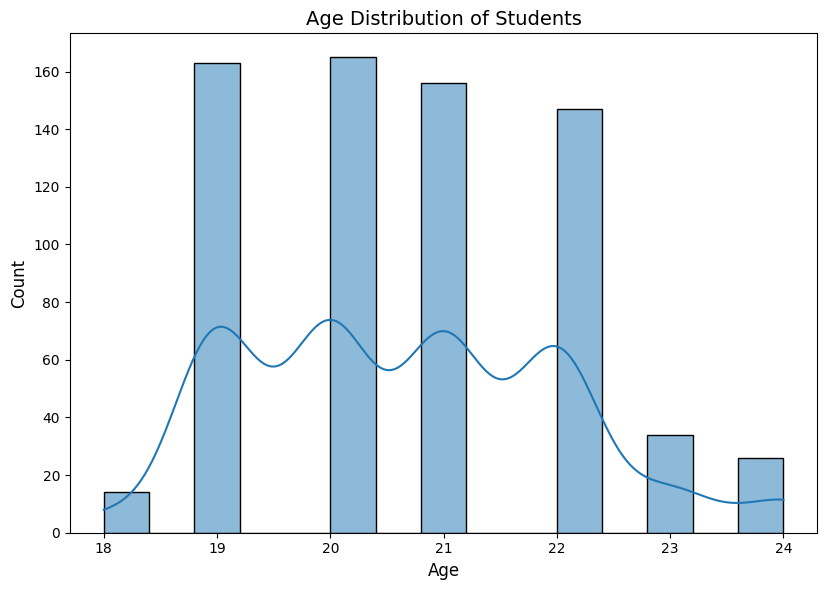

In [60]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution of Students', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

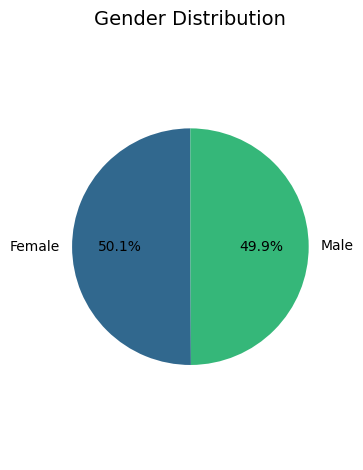

In [61]:
plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

### 1. Addiction Score Distribution

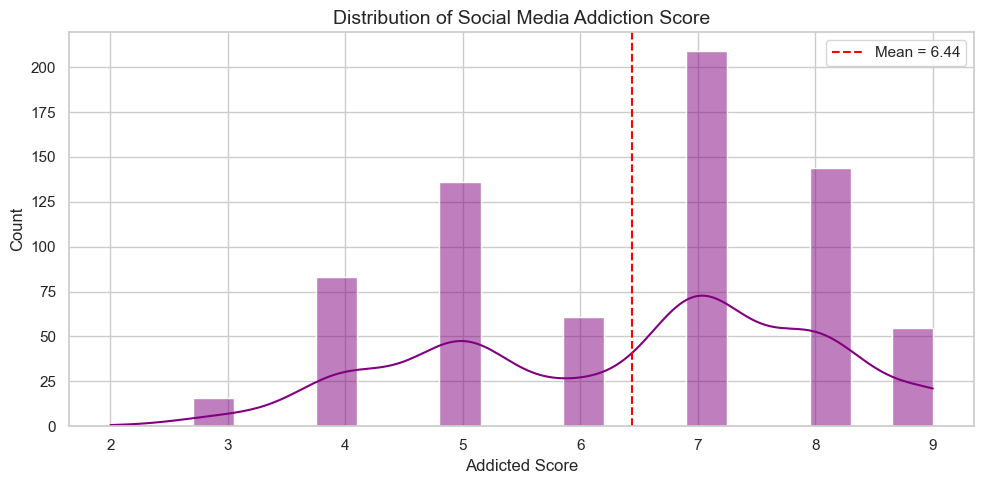

In [48]:
plt.figure(figsize=(10, 5))
mean_score = df['Addicted_Score'].mean()
sns.histplot(df['Addicted_Score'], bins=20, kde=True, color='#800080')
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean = {mean_score:.2f}')
plt.title('Distribution of Social Media Addiction Score', fontsize=14)
plt.xlabel('Addicted Score')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


This suggests that moderate to high levels of social media addiction are common among students in the sample. Only a small portion shows low engagement or signs of low dependency.

### 2. Average Addiction Score by Daily Usage 
I grouped students by usage (<2h, 2–4h, 4–6h, >6h)

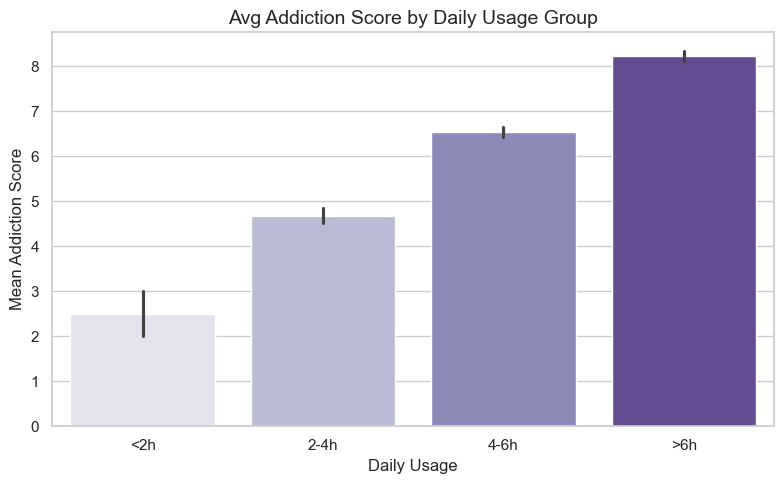

In [32]:
df['Usage_Group'] = pd.cut(df['Avg_Daily_Usage_Hours'],
                           bins=[0, 2, 4, 6, 24],
                           labels=['<2h', '2-4h', '4-6h', '>6h'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Usage_Group', y='Addicted_Score', hue='Usage_Group', palette='Purples', legend=False)
plt.title('Avg Addiction Score by Daily Usage Group', fontsize=14)
plt.xlabel('Daily Usage')
plt.ylabel('Mean Addiction Score')
plt.tight_layout()
plt.show()


### 3. Average Addiction Score by Sleep Group

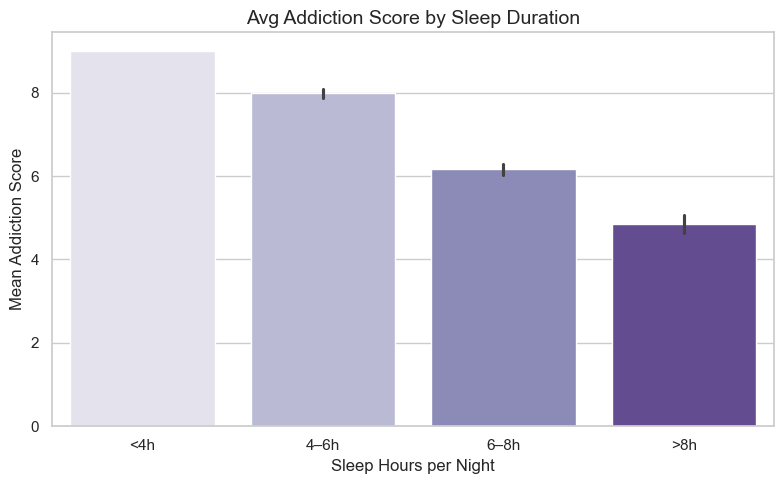

In [29]:
df['Sleep_Group'] = pd.cut(df['Sleep_Hours_Per_Night'],
                           bins=[0, 4, 6, 8, 12],
                           labels=['<4h', '4–6h', '6–8h', '>8h'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sleep_Group', y='Addicted_Score',hue='Sleep_Group', palette='Purples')
plt.title('Avg Addiction Score by Sleep Duration', fontsize=14)
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Mean Addiction Score')
plt.tight_layout()
plt.show()

### 4.Addiction Score by Academic Level 

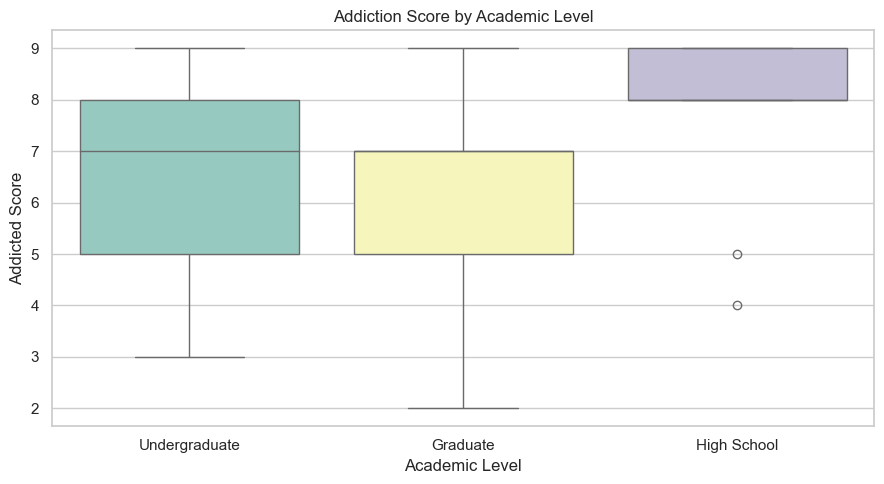

In [27]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='Academic_Level', y='Addicted_Score', hue='Academic_Level', palette='Set3', legend=False)
plt.title('Addiction Score by Academic Level')
plt.ylabel('Addicted Score')
plt.xlabel('Academic Level')
plt.tight_layout()
plt.show()

High school students show the highest and most consistent addiction scores. Undergraduates and graduates have more varied scores, but similar medians. Social media addiction appears to decrease slightly with academic progression, but there are some outliers.

### 5. Addiction Score vs Number of Social Media Conflicts

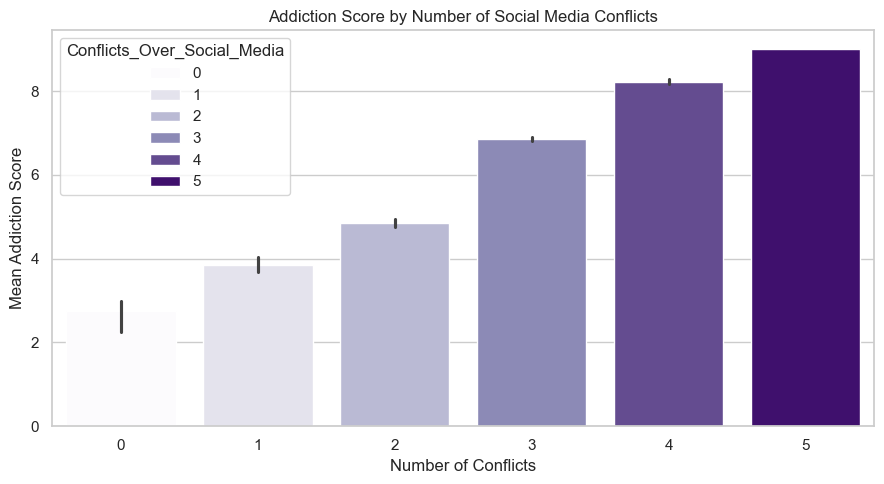

In [33]:
plt.figure(figsize=(9, 5))
sns.barplot(data=df, x='Conflicts_Over_Social_Media', y='Addicted_Score',hue='Conflicts_Over_Social_Media', palette='Purples')
plt.title('Addiction Score by Number of Social Media Conflicts')
plt.xlabel('Number of Conflicts')
plt.ylabel('Mean Addiction Score')
plt.tight_layout()
plt.show()


There is a upward trend: students with more social media conflicts tend to have higher addiction scores.

This may suggest that:

&rarr; Being chronically online increases the chance of interpersonal conflict(for example having more arguments).

&rarr; Addiction might not only be a result of excessive usage but it could also amplify social tension, especially in highly interactive platforms.

### 6. Mental Health Score by Addiction Score Group

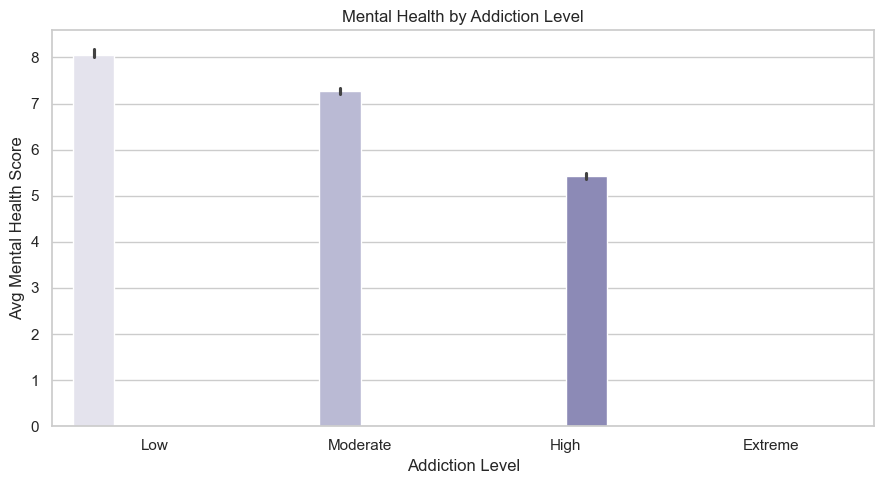

In [51]:
df['Addiction_Level'] = pd.cut(df['Addicted_Score'],
                               bins=[0, 3, 6, 9, 12],
                               labels=['Low', 'Moderate', 'High', 'Extreme'])

plt.figure(figsize=(9, 5))
sns.barplot(data=df, x='Addiction_Level', y='Mental_Health_Score', hue='Addiction_Level', palette='Purples', legend=False)
plt.title('Mental Health by Addiction Level')
plt.xlabel('Addiction Level')
plt.ylabel('Avg Mental Health Score')
plt.tight_layout()
plt.show()


Students with higher levels of social media addiction tend to report worse mental health. There's a clear decline in average mental health scores as addiction increases.

This shows a strong negative relationship between addiction and mental health.

### 7. Addiction Score by Country (Top 10)

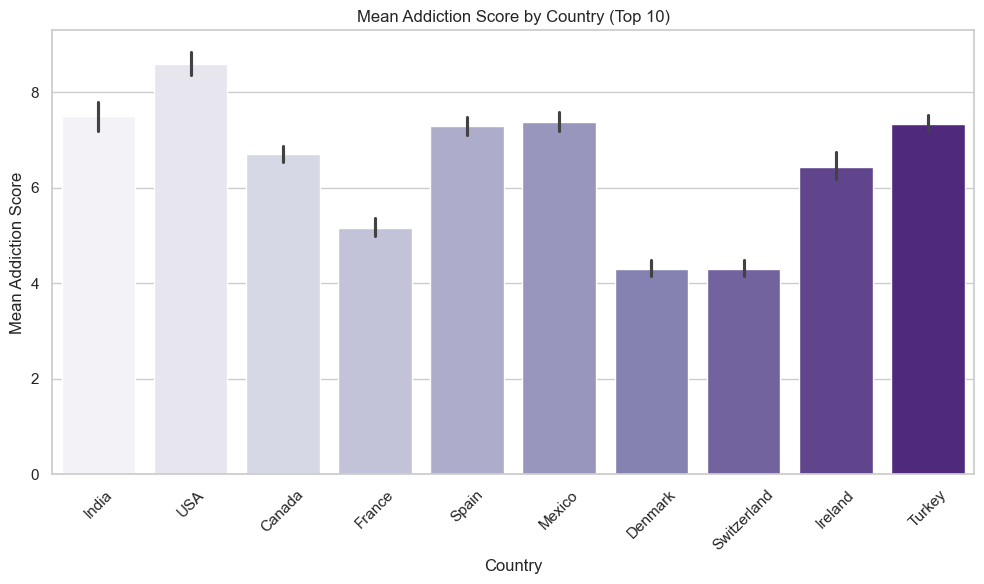

In [47]:
top_countries = df['Country'].value_counts().head(10).index
subset = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(data=subset, x='Country', y='Addicted_Score',hue='Country', estimator='mean', palette='Purples')
plt.title('Mean Addiction Score by Country (Top 10)')
plt.ylabel('Mean Addiction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###